In [ ]:
# Name: Patrick Ijieh

# Convolution Neural Network Homework

This is the 3rd homework assignment for CAP 4630 and we will go through some primary operations for image processsing and implement one of the earilest representative convolution neural network - LeNet-5 . \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
For section 1, when you implement covolution and maxpooling, you are **not** allowed to use built-in functions in Machine Learning libaries such as Scikit-learn Keras, Tensorflow, Pytorch; but you are encouraged to employ Keras for second section.

**Task Overview:**
- Basic operations for Digital Image Processing (DIP)
- LeNet-5 (Google Colab is recommended for implementation)

## 1 - Basic Image Processing ##
### 1.1 Data Preparation

Import packages and prepare image data as an array for image processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import imageio and call imread to convert image to an array.
3. **DISPLAY** the image in the output box before image-array conversion.
4. **PRINT OUT** the size of the array
5. **PRINT OUT** the numeric matrix form of image, i.e. the obtained array after image-array conversion.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [imageio](https://imageio.github.io/) is a python library for basic image reading and writing.

**Hints:**
1. Image data is under current directory, i.e., "./image.jpg".
2. You may consider importing "display" and "Image" from IPython.display for image display.

In [ ]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import display, Image

# Display original image

display(Image('./image.jpg'))

# # Convert image to array, print out the shape of array, and print out the entire array
# img_matrix = ...
# print(img_matrix.shape)
# print(img_matrix)

img_matrix = imageio.v3.imread("./image.jpg")
print(img_matrix.shape)
print(img_matrix)

(30, 30)
[[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238 207  82  50  94 145 136 157
  148 119 175  30 111 165 136 155 168 110 

### 1.2 Implementation of Convolution Filter

Process the obtained array from the image with convolution operation. **(20 Points)**

**Tasks:**
1. Prepare a 3X3 Laplacian kernel (aka Laplacial filter) with array as convolution filter.
2. Conduct convolution on image with prepared kernel.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib. (Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)


**Hints:**
1. Laplacian kernel is widely used for edge detection. Its form is shown below:


![](https://drive.google.com/uc?export=view&id=15bP8KCwHLtglJ-WXV4wolm4m46mCp3HL)

2. You may consider the following steps for this implementation.\
    2.1 Extract all centriods of processing region for each convolution operation.\
    2.2 According to each centroid, locate all indices of the elements within the local region for each convolution operation.\
    2.3 Given obtained indices, locate pixel values (i.e. our obtained array elements) and conduct element-wise product between pixel and kernel values.\
    2.4 Sum element-wise product results and assign the value to convolution result at corresponding location.\
    **Note: we did not conduct padding for processed array, and thus, convolution result will become smaller than original array. You may think about the reason.**
3. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   37.   98.  195.  173.]\
 [ -75.  -80.   56.  -65.  182.]\
 [  96.  -37. -163.   22.   68.]\
 [-101.  121.   81.  148.  -71.]\
 [   7.  127. -141.  159. -127.]]

![](https://drive.google.com/uc?export=view&id=18Iis1mJsvEaojZ7O3f3soE152Szwy8_Z)




[[ 134   37   98  195  173 -221    5  137    3  -62  -87  -39  -92 -128
  -175 -152  -77   -8  -50   13   25    1  -58  -22   -7   64  -12  -24]
 [ -75  -80   56  -65  182  -39   12  -96  -83  -99  -27  -24  -48  -70
   -12  -45  -75  -88  -92  -29  -88   -2  -15   33  -25   18   14    2]
 [  96  -37 -163   22   68 -199  -10  -89   37   29   49  -25   18  -17
    43   29  -30  -51  180  129   16  -26  -43   38   28   49   11  -19]
 [-101  121   81  148  -71  -30 -100   47   82  -13  -15  -44   21  -23
    16   74    5 -154  130  -84   47  -76  -75  -52   77  114   -7  -49]
 [   7  127 -141  159 -127  -74  142  -61   -6  -63  -23    2  -32  -67
    31  -23   57  -50  205 -110  264  -20 -135  -52  -32   -8   61   44]
 [  72  137  -99 -175  -89   29  -39  -17   22    5  -19   51  -65 -136
  -126  -10  -31 -123   -1 -304  240   33   -7   22  -97 -126   76   98]
 [  -1  -86  -46  -72  109    4  -13  -27   11  -59 -195  110  159   52
  -120  -19  -63  -17  143 -193  229  -60 -165   40    8  

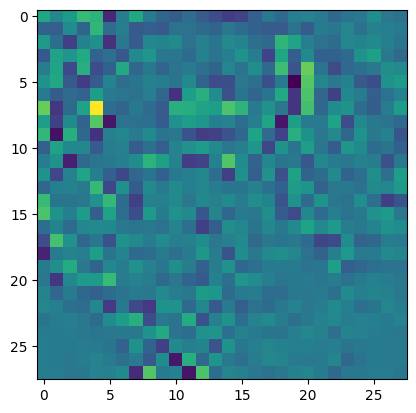

In [ ]:
######## Convolution with Laplacian Filter ##################
def kernel_multiplication(kernel, centroid):
  sum = 0
  for i in range(len(kernel)):
    for j in range(len(kernel[0])):
      sum += kernel[i][j] * centroid[i][j]

  return sum


def basic_convolution(filter, image_matrix):
  kernel_size = len(filter)
  img_size = len(image_matrix)
  num_runs = (img_size - kernel_size) + 1

  convo_array = []

  for i in range(num_runs):
    temp = []
    for j in range(num_runs):
      res = kernel_multiplication(filter,
                            image_matrix[i:(i+kernel_size), j:(j+kernel_size)])
      temp.append(res)
    convo_array.append(temp)

  convo_array = np.array(convo_array)
  return convo_array

filter = [[0,1,0],
          [1,-4,1],
          [0,1,0]]

convolution_1 = basic_convolution(filter, img_matrix)
print(convolution_1[0:10])
print(convolution_1.shape)
plt.imshow(convolution_1)


### 1.3 Modification on Convolution Scheme

Conduct the convolution with the same filter as above, but change the stride to 2. **(5 Points)**

**Tasks:**
1. Modify the convolution process with stride=2
2. **PRINT OUT** convolution result for first ten rows.
3. **PRINT OUT** the shape of the convolution result.
4. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just reduce the centroid pool according to stride=2, and then, follow the same convolution process above.
    **Note: After increase of stride, the size of convolution result is further shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   98.  173.    5.    3.]\
 [  96. -163.   68.  -10.   37.]\
 [   7. -141. -127.  142.   -6.]\
 [  -1.  -46.  109.  -13.   11.]\
 [ 106.   49.  241.  -26.  -33.]]


![](https://drive.google.com/uc?export=view&id=1UPdXt5cY1umImu2chaQLfWAnqDEpFOGV)


[[ 134   98  173    5    3  -87  -92 -175  -77  -50   25  -58   -7  -12]
 [  96 -163   68  -10   37   49   18   43  -30  180   16  -43   28   11]
 [   7 -141 -127  142   -6  -23  -32   31   57  205  264 -135  -32   61]
 [  -1  -46  109  -13   11 -195  159 -120  -63  143  229 -165    8  -27]
 [ 106   49  241  -26  -33   69   84   24   13 -258   -3  125   40  -22]
 [ -79   41  -89   18  -31   26  103  -10   81   77  106  -88   51  -19]
 [  76   24   15 -144  -18   -6   36 -164  -80 -120  -65   45  -33  -32]
 [ 196  -18   71  -43   20   50   42   50   59 -111  -45  -15   58 -169]
 [ -38  -43   48   -9   -5   26 -164   61  -16   -5  126   96   -8   71]
 [-234   26  110   29  -39  -31   86 -111  -10   60  -27   15    1   44]]
(14, 14)


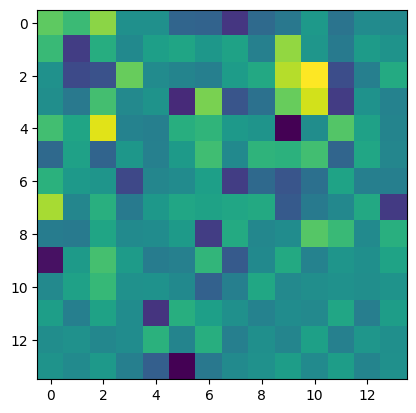

In [ ]:
######## Convolution with Laplacian Filter and the setting of stride=2 ##################
def convolution_with_stride_two(filter, image_matrix):
  kernel_size = len(filter)
  img_size = len(image_matrix)
  size_diff = img_size - kernel_size

  convo_array = []

  for i in range(0, size_diff + 1, 2):
    temp = []
    for j in range(0, size_diff + 1, 2):
      res = kernel_multiplication(filter,
                            image_matrix[i:(i+kernel_size), j:(j+kernel_size)])
      temp.append(res)
    convo_array.append(temp)

  convo_array = np.array(convo_array)
  return convo_array


reduced_image = img_matrix[0:29, 0:29]
convolution_2 = convolution_with_stride_two(filter, reduced_image)
print(convolution_2[0:10])
print(convolution_2.shape)
plt.imshow(convolution_2)


### 1.4 Implementation of MaxPooling

Process the obtained array from the image with MaxPooling operation. **(15 Points)**

**Tasks:**
1. Prepare a 2X2 pooling mask.
2. Conduct max pooing on image with prepared mask.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just modify the centroid pool to top-left corner pool, and then, follow the same strategy above.\
    **Note: After the pooling, the size of the array is shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., pooled_results[0:5,0:5].The example figure is below.

[[ 98. 112.  93. 195. 173.]\
 [ 84. 127. 137. 253. 254.]\
 [ 85. 145. 225. 255. 242.]\
 [104. 178. 216. 230. 242.]\
 [ 95. 186. 147. 248. 242.]]

![](https://drive.google.com/uc?export=view&id=1a18IWjrN0xHcp7bSNuj8kUM4JFFj3ebd)



[[ 98 112  93 195 173]
 [ 84 127 137 253 254]
 [ 85 145 225 255 242]
 [104 178 216 230 242]
 [ 95 186 147 248 242]]
(15, 15)


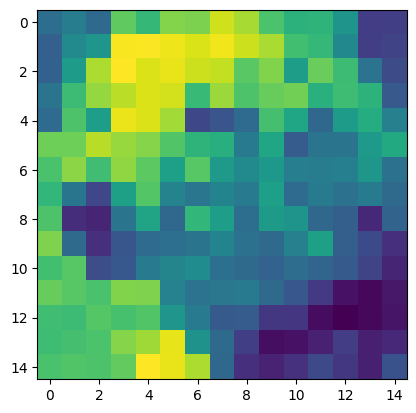

In [ ]:
######## MaxPooling with the setting of 2X2 ##################
def max_pooling(image_matrix, mask=2):
  img_size = len(image_matrix)

  convo_array = []
  for i in range(0, img_size, mask):
    temp = []
    for j in range(0, img_size, mask):
      res = np.max(image_matrix[i:(i+mask), j:(j+mask)])
      temp.append(res)
    convo_array.append(temp)

  convo_array = np.array(convo_array)
  return convo_array

max_pool = max_pooling(img_matrix)
print(max_pool[0:5, 0:5])
print(max_pool.shape)
plt.imshow(max_pool)

## 2 - Convolution Neural Network ##

In this section, we will use LeNet-5 (LeCun et al., 1998), one of representative deep nueral networks, to solve a  classification problem with Fashion MNIST benchmark.

### 2.1 Library Preparation

Import useful deep learning packages.

**Tasks:**
1. Import numpy and rename it to np.
2. Import torch
3. Import torch.nn.
4. Import torch.nn.functional and rename it to F
5. Import torchvision
6. Import torchvision.tranaforms and rename it to transforms

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


### 2.2 Training Data Preparation

Import useful packages and prepare Fashion MNIST data. **(20 Points)**

**Tasks:**
1. Download Fashion MNIST data and split it with torchvision.datasets and prepare training/test data sets.
2. Preprocess training/test data with normalization, dimension extension, and zero padding (for LeNet-5 configuration).
3. Preprocess label data to binary class matrices.
4. **PRINT OUT** first image in training set and its correponding label index
5. **PRINT OUT** the shape of total training data, the number of training samples, and the number of test samples.

**Hints**
1. You may consider load function from the reference link. https://pytorch.org/vision/main/datasets.html It provides dataloader function which can tackle downloading and data splitting automatically.
2. For preprocessing transformation, you can check this link: https://nextjournal.com/gkoehler/pytorch-mnist
2. For image display, consider showing the image and label **before dimension extension**.


100%|██████████| 26421880/26421880 [00:02<00:00, 12776665.39it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203093.92it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3737812.80it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6689057.31it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw

Figure(640x480)
batch_idx=0
torch.Size([64, 1, 28, 28])
len(train_data)=60000
len(test_data)=10000


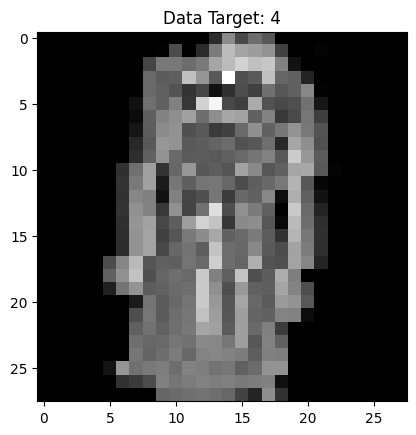

In [ ]:
# Define transformation for training and testing data.
# For training, use RandomCrop, RandomRotation and Normalization with mean 0.1307 variance0.3081
# For testing, just use Normalization.


# Load the training and testing datasets from Pytorch

batch_size = 64

train_data = torchvision.datasets.FashionMNIST("./",
                                                 train=True, download=True,
                                                 transform=torchvision.transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.RandomCrop(28),
                                                    transforms.RandomRotation(45),
                                                    transforms.Normalize(
                                                        (0.1307,), (0.3081,))
                                                  ]))
test_data = torchvision.datasets.FashionMNIST("./",
                                                 train=False, download=True,
                                                 transform=torchvision.transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(
                                                        (0.1307,), (0.3081,))
                                                  ]))

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          shuffle=True)

examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)


# Print out first image and its correponding label index using matplotlib.
fig = plt.figure()
plt.imshow(example_data[0][0], cmap="gray", interpolation="none")
plt.title(f'Data Target: {example_target[0]}')

print(fig)
print(f'{batch_idx=}')
print(example_data.shape)
print(f'{len(train_data)=}')
print(f'{len(test_data)=}')

### 2.3 LeNet-5

Construct LeNet-5 as learning model for Fashion MNIST classification task. **(15 Points)**

**Tasks:**
1. Build up LeNet-5 by creating a new Net that inherit nn.Module. The class needs to have __init__ and forward functions.

2. **PRINT OUT** the model summary using torchsummary library (import torchsummary).

**Hints:**
1. You may consider the convolution neural network shown in class as an example.
2. The structure of LeNet-5 is listed below. Try to map each step to related processing operation. You can also search some materials to faciliate implementation.
3. Some architecture settings are listed below.
    - To have 32 X 32 input, you need padding=2 for the first 2D convolution filter (original image is 28 X 28)
    - The kernel size for 2D convolution filter is **5 X 5**. You may think about the reason by calculation.
    - We change tanh activation to **"relu"** activation here.
    - We use MaxPooling instead of original AveragePooling. Please use size 2 X 2 for implementation.
    - Please use **Flatten** to onvert 2D convolution layer to 1D fully connected layer.
    - Gaussian connections are replaced with Softmax, and thus, the outputs are activated by Softmax function based on the number of classes.

4. Validation result:
    - Total params: 61,706
    - Trainable params: 61,706
    - Non-trainable params: 0

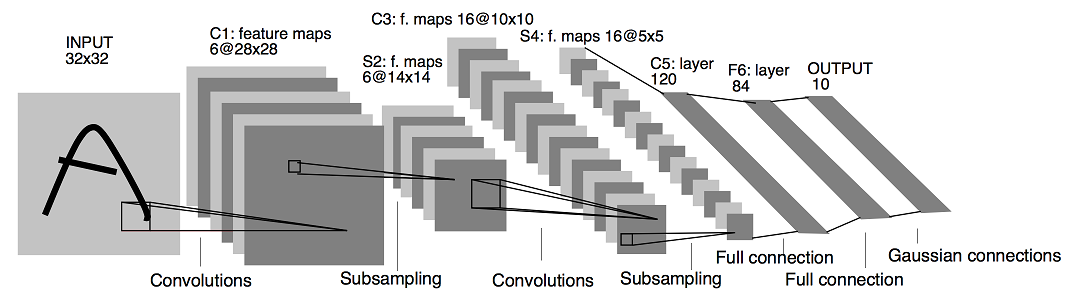

**References:**
- http://yann.lecun.com/exdb/lenet/


In [ ]:
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, 1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5, 1, padding=0)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        output = self.fc3(x)
        return output

# Decide whether you want to run your model on cpu or gpu.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Linear-3                  [-1, 120]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


### 2.4 LeNet-5 Model Training

Train LeNet-5 model with specific training strategy. **(20 Points)**

**Tasks:**
1. Set batch size to **64** for training.
2. Pick **SGD optimizer** with learning rate of **0.1**, momentum of **0.9**, and **nesterov=True**, for model training.
3. Pick **cross-entropy** loss function for optimization and evaluation metrics is set to **accuracy**.
4. Train the model with **10 epochs** and **PRINT OUT** : **train loss** and **train accuracy** after each epoch.
5. Evaluate model with test data set and **PRINT OUT** : **test loss** and **test accuracy**.

**Hints:**
1. You may consider the examples from Keras to specify optimizer parameters. https://pytorch.org/docs/stable/optim.html
2. You may use the example shown in class to faciliate this implementation.
3. You may see slightly different results every time you run the training. It is normal since there is randomness for training.

In [ ]:
### Train with SGD optimizer with learning rate =0.1, regularizer=4e-5, momentum=0.9

epochs = 10
regularizer=4e-5
learning_rate = 0.1
momentum = 0.9

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum, nesterov=True)
loss_func = nn.CrossEntropyLoss()

for i in range(epochs):
  net.train()
  train_loss = 0.0
  correct = 0
  total = 0

  for batch_idx, (inputs, labels) in enumerate(train_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = loss_func(outputs, labels)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  train_accuracy = 100 * correct / total
  train_loss = train_loss/len(train_loader)
  print(f"Epoch {i+1}/{epochs}: Train Loss = {train_loss:.8f}, Train Accuracy = {train_accuracy:.2f}%")

net.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
  for batch_idx, (inputs, labels) in enumerate(test_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    loss = loss_func(outputs, labels)
    test_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
test_loss = test_loss/len(test_loader)
print(f"Test Loss = {test_loss:.8f}, Test Accuracy = {test_accuracy:.2f}%")

Epoch 1/10: Train Loss = 0.78533661, Train Accuracy = 70.66%
Epoch 2/10: Train Loss = 0.60592417, Train Accuracy = 77.95%
Epoch 3/10: Train Loss = 0.58352362, Train Accuracy = 78.87%
Epoch 4/10: Train Loss = 0.58136704, Train Accuracy = 79.17%
Epoch 5/10: Train Loss = 0.57651793, Train Accuracy = 79.37%
Epoch 6/10: Train Loss = 0.57727404, Train Accuracy = 79.12%
Epoch 7/10: Train Loss = 0.57488001, Train Accuracy = 79.57%
Epoch 8/10: Train Loss = 0.56869995, Train Accuracy = 79.73%
Epoch 9/10: Train Loss = 0.56797426, Train Accuracy = 79.61%
Epoch 10/10: Train Loss = 0.56917059, Train Accuracy = 79.61%
Test Loss = 0.56231334, Test Accuracy = 81.19%
